# Lab 3
We'll use this lab as an experiment of using a single file where you fill in codeblocks where necessary. They will be available as .py and .ipynb. Using the latter, or Jupyter Notebook, is highly recommended, as it provides substantially better feedback.


Provide your outputs in a simple report, along with textual answers.


The idea behind this format is to clarify what sort of output is required, as all answers run on tests based in the `tests.py` file.

In [9]:
"""
# Lab 3
"""
import nltk
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Exercise 1 - Gender detection of names
In NLTK you’ll find the corpus “corpus.names”. A set of 5000 male and 3000 female names.
1. Finish the GenderDataset class to assign labels based on the corpus file ids. Select a split ratio for
train/test data. Based on previous experiences, perhaps?
2. Finish the Classifier class to support the following classifiers:
• Decision tree
• Naïve bayes
3. Finish the FeatureExtractor class to receive features from the input data. Explain your results, and
what do you think would change if you altered your feature extractor? Alternatively, try to debug
your extractor and experiment with different features.

In [10]:
class GenderDataset:
    def __init__(self):
        self.names = nltk.corpus.names
        self.data = None
        self.build()

    def make_labels(self, gender):
        """
        this function is to help you get started
        based on the passed gender, as you can fetch from the file ids,
        we return a tuple of (name, gender) for each name
        
        use this in `build` below, or do your own thing completely :)
        """
        return [(n, gender) for n in self.names.words(gender + ".txt")]
    
    def build(self):
        """ TODO
        combine the data in "male" and "female" into one
        remember to randomize the order
        """
        self.data = (self.make_labels("male") + self.make_labels("female"))
        random.shuffle(self.data)
        pass
    
    def split(self, ratio):
        return train_test_split(self.data, test_size=ratio)

class Classifier:
    def __init__(self, classifier):
        self.classifier = classifier
        self.model = None
    
    def train(self, data):
        # TODO: train classifier and store model
        self.model = self.classifier.train(data)
        pass
        
    def test(self, data):
        # TODO: return accuracy for the model on input data
        return nltk.classify.accuracy(self.model, data)
    
    def train_and_evaluate(self, train, test):
        self.train(train)
        return self.test(test)
        
    def show_features(self):
        # OPTIONAL
        pass

                                 
class FeatureExtractor:
    def __init__(self, data):
        self.data = data
        self.features = []  
        
        self.build()
                 
    @staticmethod
    def text_to_features(name):
        # TODO: create a dict of features from a name
        return {
            'suffix1': name[-1],
            'suffix2': name[-2:]
        }
    
    def build(self):
        # TODO: populate your features with the above function
        for (name, gender) in self.data:
            self.features.append((self.text_to_features(name), gender))
        pass

Note: you should achieve an accuracy of well above 70%!

In [11]:
split_ratio = 0.2  # TODO: modify
train, test = GenderDataset().split(ratio=split_ratio)

classifiers = {
    "decision_tree": Classifier(nltk.DecisionTreeClassifier), # TODO
    "naive_bayes": Classifier(nltk.NaiveBayesClassifier), # TODO
}

train_set = FeatureExtractor(train).features
test_set = FeatureExtractor(test).features


for name, classifier in classifiers.items():
    acc = classifier.train_and_evaluate(train_set, test_set)
    print("Model: {}\tAccuracy: {}".format(name, acc))

Model: decision_tree	Accuracy: 0.7960981749528006
Model: naive_bayes	Accuracy: 0.7835116425424795


## Exercise 2 - Spam or ham
Spam or ham is referred to a mail being spam or regular ("ham"). Follow the instructions and implement the `TODOs`

In [12]:
spam = pd.read_csv(
    'spam.csv',
    usecols=["v1", "v2"],
    encoding="latin-1"
).rename(columns={"v1": "label", "v2": "text"})

print(spam.label.value_counts())
spam.head()

ham     4825
spam     747
Name: label, dtype: int64


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
""" TODO: transform label to numerical
Expected output:
0    4825
1     747
Name: label, dtype: int64

hint: you can use "apply" or "replace" for a column in pandas
"""
spam.label = spam.label.replace({"ham":0,"spam":1}) # your transformation goes here
spam.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [14]:
from nltk import stem
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')

In [15]:
class TextCleaner:
    def __init__(self, text):
        self.text = nltk.word_tokenize(text) # TODO: tokenize
        self.stemmer = stem.lancaster.LancasterStemmer() # TODO: incorporate a stemmer of your choice
        self.stopwords = set(stopwords.words('english'))
        self.lem = WordNetLemmatizer() # TODO: lemmatizer
    
    """
    Create small functions to replace your tokens (self.text)
    iteratively. Such as a lowercase function.
    """
    def lowercase(self):
        self.text = [w.lower() for w in self.text]

    def stem_words(self):
        self.text = map(lambda word: self.stemmer.stem(word), self.text)

    def remove_stopwords(self):
        self.text = [word for word in self.text if word not in self.stopwords]

    def lemmatizer(self):
        self.text = map(lambda word: self.lem.lemmatize(word), self.text)

    def clean(self):
        self.lowercase()
        """
        TODO: populate with your defined cleaning functions here
        perhaps you want some conditional values to
        control which functions to use?
        """
        self.remove_stopwords()
        self.stem_words()
        self.lemmatizer()

        # finally, return it as a text 
        return " ".join(self.text)

In [16]:
clean = lambda text: TextCleaner(text).clean()
spam.text = spam.text.apply(clean)

In [17]:
spam.head()

,label,text
0,0,"go jurong point , crazy .. avail bug n gre wor..."
1,0,ok lar ... jok wif u on ...
2,1,fre entry 2 wkly comp win fa cup fin tkts 21st...
3,0,u dun say ear hor ... u c already say ...
4,0,"nah n't think goe usf , liv around though"


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

split_ratio = 0.2 # TODO: modify
X_train, X_test, y_train, y_test = train_test_split(
    spam.text, spam.label, test_size=split_ratio, random_state=4310)

# TODO: vectorize with sklearn
vectorizer = TfidfVectorizer()
# TODO: fit the vectorizer to your training data
X_train = vectorizer.fit_transform(X_train)

# TODO: set up a multinomial classifier
classifier = MultinomialNB()
if classifier:
    classifier.fit(X_train, y_train)
    
vectorized = None

In [19]:
def predict(model, vectorizer, data, all_predictions=False):
    data = vectorizer.transform(data) # TODO apply the transformation from the vectorizer to test data 
    if all_predictions:
        return model.predict_proba(data)
    else:
        return model.predict(data)

def print_examples(data, probs, label1, label2, n=10):
    percent = lambda x: "{}%".format(round(x*100, 1))

    for text, pred in list(zip(data, probs))[:n]:
        print("{}\n{}: {} / {}: {}\n{}".format(
            text,
            label1,
            percent(pred[0]),
            label2,
            percent(pred[1]),
            "-" * 100  # to print a line
        ))

In [20]:
if classifier:
    y_probas = predict(classifier, vectorizer, X_test, all_predictions=True)
    print_examples(X_test, y_probas, "ham", "spam", 10)

    y_pred = predict(classifier, vectorizer, X_test)
    # TODO display a confusion matrix on the test set vs predictions
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)

    # show precision and recall in a confusion matrix
    tn, fp, fn, tp = confusion_mat.ravel()
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)

    print("Recall={}\nPrecision={}".format(round(recall, 2), round(precision, 2)))

world famam ....
ham: 95.0% / spam: 5.0%
----------------------------------------------------------------------------------------------------
\aww must near dead ! wel jez iscom todo workand whilltak forev ! \ '' ''
ham: 96.9% / spam: 3.1%
----------------------------------------------------------------------------------------------------
bab . hop ok . shit night sleep . fel asleep 5.iåõm knack iåõm dread work tonight . thou upto tonight . x
ham: 99.2% / spam: 0.8%
----------------------------------------------------------------------------------------------------
thank . lik wel ...
ham: 99.4% / spam: 0.6%
----------------------------------------------------------------------------------------------------
'm read text sent . meant jok . read light
ham: 96.9% / spam: 3.1%
----------------------------------------------------------------------------------------------------
oky ì_ wan meet bish ? co bish . 'm driv today .
ham: 99.7% / spam: 0.3%
------------------------------------------

## Exercise 3 - Word features
Word features can be very useful for performing document classification, since the words that appear in a document give a strong indication of what its semantic content is. However, many words occur very infrequently, and some of the most informative words in a document may never have occurred in our training data. One solution is to make use of a lexicon, which describes how different words relate to each other.

Your task:
- Use the WordNet lexicon and augment the movie review document classifier (See NLTK book, Ch. 6, section 1.3) to use features that generalize the words that appear in a document, making it more likely that they will match words found in the training data.

Download wordnet and import

1. Again you need to select a classifier, depending on the problem. Think of feature independence.
2. Finish the word_to_syn method. This should return a list of all unique synonyms for an input word.
3. Finish the synset_expansion method. This should return a list of lemmas and the source word for
a list of words.

In [21]:
#nltk.download('wordnet')
#nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
from nltk.corpus import wordnet as wn
import random

In [22]:
# experimental version of word to syn
def word_to_syn_list(word):
    synonyms = [ss.lemma_names() for ss in wn.synsets(word)]
    synonyms = [w for sublist in synonyms for w in sublist]
    return list(set(synonyms))

In [23]:
#TODO: implement a fn that returns a synonym for "word" if available, 
# otherwise returns the word itself
def word_to_syn(word):
    synonyms = [ss.lemma_names() for ss in wn.synsets(word)]
    synonyms = [w for sublist in synonyms for w in sublist]
    synonyms = list(set(synonyms))
    if(len(synonyms)>1):
        for w in synonyms:
            if(w!=word):
                return w
    else:
        return word
    

In [24]:
"""
this is from Ch. 6, sec. 1.3, with slight modifications
note that word_to_syn(word) (from the above implementation)
is in the beginning of the following function
"""
documents = [([word_to_syn(word) for word in list(movie_reviews.words(fileid))], category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
n_most_freq = 2000
word_features = list(all_words)[:n_most_freq]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [26]:
featuresets = [(document_features(d), c) for (d, c) in documents]

split_ratio = 0.2 # TODO: modify
train_set, test_set = train_test_split(featuresets, test_size=split_ratio)

# TODO: select a suitable classifier
classifier = nltk.NaiveBayesClassifier
model = classifier.train(train_set)

In [27]:
# TODO: return a flattened list of input words and their lemmas
def synset_expansion(words):
    synonyms = [wn.synsets(w) for w in words]
    synonyms = [w for sublist in synonyms for w in sublist]
    synonyms = [ss.lemma_names() for ss in synonyms]
    synonyms = [w.lower() for sublist in synonyms for w in sublist]
    return sorted(list(set(synonyms)))

In [28]:
# some assertions to test your code :-)
assert sorted(synset_expansion(["pc"])) == ["microcomputer", "pc", "personal_computer"]
assert sorted(synset_expansion(["programming", "coder"])) == [
    'coder',
    'computer_programing',
    'computer_programmer',
    'computer_programming',
    'program',
    'programing',
    'programme',
    'programmer',
    'programming',
    'scheduling',
    'software_engineer'
]

In [29]:
doc_featuresets = [(document_features(d), c) for (d, c) in documents]
doc_train_set, doc_test_set = train_test_split(doc_featuresets, test_size=0.1)

doc_model = model.train(doc_train_set)
doc_model.show_most_informative_features(5)
print("Accuracy: ", nltk.classify.accuracy(doc_model, doc_test_set))

Most Informative Features
          contains(miss) = True              neg : pos    =      9.1 : 1.0
         contains(mulan) = True              pos : neg    =      8.9 : 1.0
        contains(seagal) = True              neg : pos    =      7.9 : 1.0
         contains(damon) = True              pos : neg    =      6.9 : 1.0
         contains(drama) = True              pos : neg    =      6.9 : 1.0
Accuracy:  0.725


In [34]:
def lexicon_features(reviews):
    review_words = set(reviews)
    features = {}
    expanded_word_features = synset_expansion(word_features)
    for word in expanded_word_features:
        if word not in word_features:
            features['synset({})'.format(word)] = (word in review_words)
        features['contains({})'.format(word)] = (word in review_words)

    return features

Question: do you see any issues with including the synsets? Experiment a bit with different words and verify your ideas.

In [ ]:
# warning: this may take some time to run
lex_featuresets = [(lexicon_features(d), c) for (d, c) in documents]
lex_train_set, lex_test_set = train_test_split(lex_featuresets, test_size=0.1)
lex_model = model.train(lex_train_set)  # the same classifier as you defined above
lex_model.show_most_informative_features()
print("Accuracy: ", nltk.classify.accuracy(lex_model, lex_test_set))

## Exercise 4 -- Experimentation
This exercise is largely open to experiment with and testing your skills thus far!
Large websites are an ideal place to look for large corpora of natural language. In this exercise, you're free to implement what you've learned on real-world data, mined from youtube (see `youtube_data`). Reuse classes defined earlier on in the exercise if you want.

The only requirement here is to **use a classifier not previously used in the exercise**

with the help of: https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

### Step 1
Selecting relevant columns from the youtube csv file

In [182]:
import pandas as pd
import numpy as np

In [400]:
youtube = pd.read_csv(
    './youtube_data/videos.csv',
    usecols=["title", "category_id", "tags", "views", "likes", "dislikes", "comment_count", "description"],
    encoding="latin-1"
)
youtube.notna()
youtube.head()

,title,category_id,tags,views,likes,dislikes,comment_count,description
0,WE WANT TO TALK ABOUT OUR MARRIAGE,22,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,The Trump Presidency: Last Week Tonight with J...,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,Nickelback Lyrics: Real or Fake?,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...
4,I Dare You: GOING BALD!?,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...


In [221]:
print(youtube.description)

0        SHANTELL'S CHANNEL - https://www.youtube.com/s...
1        One year after the presidential election, John...
2        WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3        Today we find out if Link is a Nickelback amat...
4        I know it's been a while since we did this sho...
                               ...                        
40944       The Cat Who Caught the Laser - Aaron's Animals
40945                                                  NaN
40946    I had so much fun transforming Safiyas hair in...
40947    How Black Panther Should Have EndedWatch More ...
40948    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 40949, dtype: object


### Step 2
Cleaning and preparing the text

In [399]:
import string
""" 
Modify TextCleaner class to include:
-removing punctuation
-decoding non-ascii characters
-removing whitespaces
 """
class TextCleaner_v2:
    def __init__(self, text):
        translator = str.maketrans('', '', string.punctuation)
        self.text = str(text).translate(translator)
        self.text = nltk.word_tokenize(self.text) # TODO: tokenize
        self.stemmer = stem.lancaster.LancasterStemmer() # TODO: incorporate a stemmer of your choice
        self.stopwords = set(stopwords.words('english'))
        self.lem = WordNetLemmatizer() # TODO: lemmatizer
    
    """
    Create small functions to replace your tokens (self.text)
    iteratively. Such as a lowercase function.
    """
    def lowercase(self):
        self.text = [w.lower() for w in self.text]

    def stem_words(self):
        self.text = map(lambda word: self.stemmer.stem(word), self.text)

    def remove_non_ascii_char(self):
        self.text = [word.encode('ascii', 'ignore').decode('ascii') for word in self.text]
        #self.text = [word.encode('ascii', 'ignore').word.decode('ascii') for word in self.text]

    def remove_whitespace(self):
        self.text = [" ".join(word.split()) for word in self.text]

    def remove_stopwords(self):
        self.text = [word for word in self.text if word not in self.stopwords]

    def lemmatizer(self):
        self.text = map(lambda word: self.lem.lemmatize(word), self.text)    

    def remove_words_start_http(self):
        self.text = [word for word in self.text if 'http' not in word]

        
    def clean(self):
        self.lowercase()
        self.remove_non_ascii_char()
        self.remove_stopwords()
        #self.stem_words()
        self.lemmatizer()
        self.remove_words_start_http()

        # finally, return it as a text 
        return " ".join(self.text)

In [401]:
clean = lambda text: TextCleaner_v2(text).clean()
youtube.title = youtube.title.apply(clean) 
youtube.description = youtube.description.apply(clean) 
youtube.tags = youtube.tags.str.replace('"','', regex=True).str.replace("|"," ", regex=True)

youtube.head()

,title,category_id,tags,views,likes,dislikes,comment_count,description
0,want talk marriage,22,SHANtell martin,748374,57527,2966,15954,shantells channel video 4k lens drone gear cam...
1,trump presidency last week tonight john oliver...,24,last week tonight trump presidency last week t...,2418783,97185,6146,12703,one year presidential election john oliver dis...
2,racist superman rudy mancuso king bach lele pons,23,racist superman rudy mancuso king bach racist ...,3191434,146033,5339,8181,watch previous video nnsubscribe watching li...
3,nickelback lyric real fake,24,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,today find link nickelback amateur secret nick...
4,dare going bald,24,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,know since show back might best episode yetnle...


### Step 3
Read youtube category data from json file

In [443]:
import json
with open('youtube_data/category_id.json') as data_file:    
    category_data = json.load(data_file)


# filter only on the categories present in the videos.csv file
id_to_category = [(int(el['id']),el['snippet']['title']) for el in category_data if int(el['id'] ) in cat_in_youtube_data]

In [520]:
#transform the list into various forms to be usefull for later
id_dict = dict(id_to_category)
list_id = id_dict.keys()
list_cat = list(id_dict.values())

list_cat

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Travel & Events',
 'Gaming',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Shows']

### Step 4
Make new dataframe with only necessary data

In [516]:
youtube_data = [youtube['category_id'], youtube['description']]
headers = ['category_id','description']
youtube_data = pd.concat(youtube_data, axis=1, keys=headers)

#getting the unique categories from the youtube data
cat_in_youtube_data = list(set(youtube_data.category_id.to_list()))

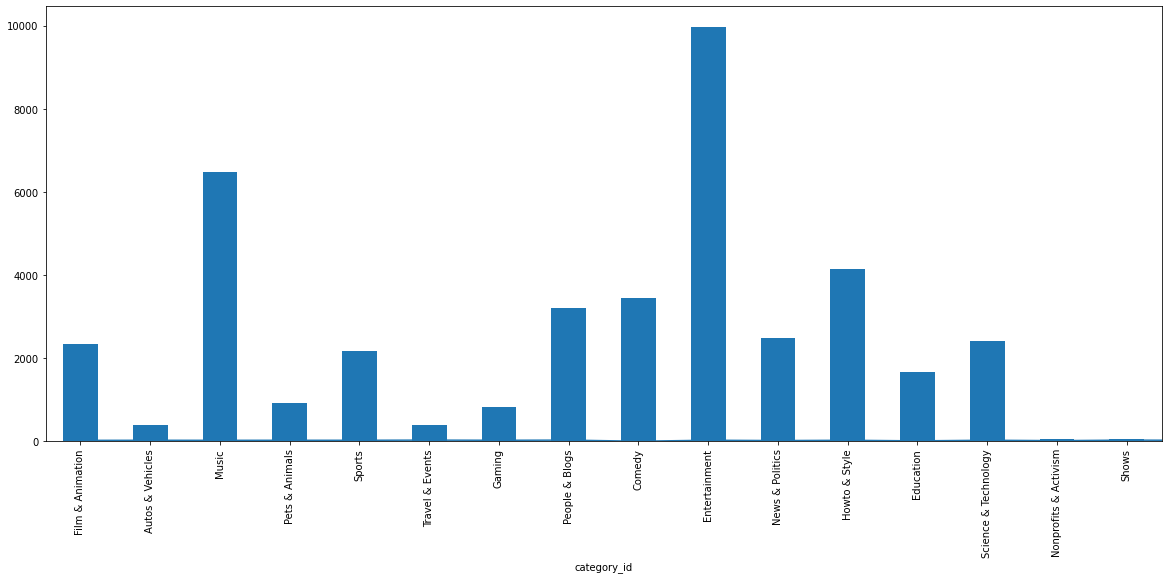

In [522]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))

youtube_data.groupby('category_id').description.count().plot.bar(ylim=0)
ax = youtube_data.category_id.plot()

#Plotting names from the category_id json file to the x-axis labels
ax.set_xticklabels(list_cat, rotation=90)
plt.show()

PS. In this exercise I wanted to train a classifier for more than two categories, like they do here https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f. Unfortunately, I do not have time to finish it but did as much as I had time for.